In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import jax
import hssm

/Users/javierrojas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('data_wt_exp5.csv')

In [3]:
df

,Unnamed: 0,participant,date,trial,angle,stim,stim_strength,incentive,desirability,valence,stake,endowment_size,resp,rt,correct,outcome,remain_endowment
0,0,1,2023-03-24_19h32.38.312,1,0.801364,0.8014,0.801364,1,-1.0,gain,0.5,0,1,1115.0,1,0.0,0.0
1,1,1,2023-03-24_19h32.38.312,2,-88.788249,-1.2118,1.211751,1,-1.0,gain,0.5,0,-1,2170.0,1,0.0,0.0
2,2,1,2023-03-24_19h32.38.312,3,-0.801364,-0.8014,0.801364,1,-1.0,gain,0.5,0,-1,2096.0,1,0.0,0.0
3,3,1,2023-03-24_19h32.38.312,4,-1.211751,-1.2118,1.211751,1,-1.0,gain,0.5,0,1,1687.0,0,0.0,0.0
4,4,1,2023-03-24_19h32.38.312,5,88.788249,1.2118,1.211751,1,-1.0,gain,0.5,0,-1,2857.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,19195,600,2023-03-27_18h03.18.908,28,88.788249,1.2118,1.211751,1,-1.0,loss,-0.5,16,1,2616.0,1,-0.5,9.5
19196,19196,600,2023-03-27_18h03.18.908,29,-89.198636,-0.8014,0.801364,1,-1.0,loss,-0.5,16,1,2698.0,0,-0.5,9.0
19197,19197,600,2023-03-27_18h03.18.908,30,0.801364,0.8014,0.801364,1,-1.0,loss,-0.5,16,-1,1673.0,0,-0.5,8.5
19198,19198,600,2023-03-27_18h03.18.908,31,1.211751,1.2118,1.211751,1,-1.0,loss,-0.5,16,-1,1415.0,0,-0.5,8.0


In [4]:
df.columns

Index(['Unnamed: 0', 'participant', 'date', 'trial', 'angle', 'stim',
       'stim_strength', 'incentive', 'desirability', 'valence', 'stake',
       'endowment_size', 'resp', 'rt', 'correct', 'outcome',
       'remain_endowment'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,participant,trial,angle,stim,stim_strength,incentive,desirability,stake,endowment_size,resp,rt,correct,outcome,remain_endowment
count,19200.00000,19200.000000,19200.000000,1.920000e+04,1.920000e+04,19200.000000,19200.0,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000
mean,9599.50000,300.500000,16.500000,-3.814079e-17,2.162622e-18,1.006557,1.0,-0.004167,0.000000,8.000000,0.061250,1864.875555,0.609792,-0.001042,7.947474
std,5542.70692,173.209351,9.233333,6.293387e+01,1.027329e+00,0.205199,0.0,1.000017,0.500013,8.000208,0.998148,1469.711715,0.487810,0.354223,4.640654
min,0.00000,1.000000,1.000000,-8.919864e+01,-1.211800e+00,0.801364,1.0,-1.000000,-0.500000,0.000000,-1.000000,20.200000,0.000000,-0.500000,0.000000
25%,4799.75000,150.750000,8.750000,-2.310588e+01,-9.040000e-01,0.801364,1.0,-1.000000,-0.500000,0.000000,-1.000000,1084.600000,0.000000,-0.500000,4.000000
50%,9599.50000,300.500000,16.500000,0.000000e+00,0.000000e+00,1.006557,1.0,-1.000000,0.000000,8.000000,1.000000,1547.700000,1.000000,0.000000,8.000000
75%,14399.25000,450.250000,24.250000,2.310588e+01,9.040000e-01,1.211751,1.0,1.000000,0.500000,16.000000,1.000000,2221.700000,1.000000,0.000000,12.000000
max,19199.00000,600.000000,32.000000,8.919864e+01,1.211800e+00,1.211751,1.0,1.000000,0.500000,16.000000,1.000000,45408.800000,1.000000,0.500000,16.000000


/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_68489/337911667.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="rt", kde=True,


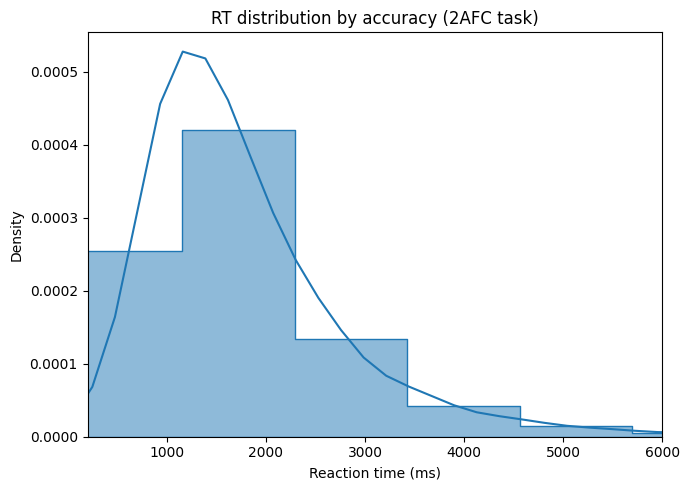

In [6]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x="rt", kde=True,
             element="step", stat="density", common_norm=False,
             bins=40, palette={"Correct": "tab:blue", "Error": "tab:red"})

plt.xlabel("Reaction time (ms)")
plt.ylabel("Density")
plt.title("RT distribution by accuracy (2AFC task)")
plt.xlim(200, 6000)
plt.tight_layout()
plt.show()

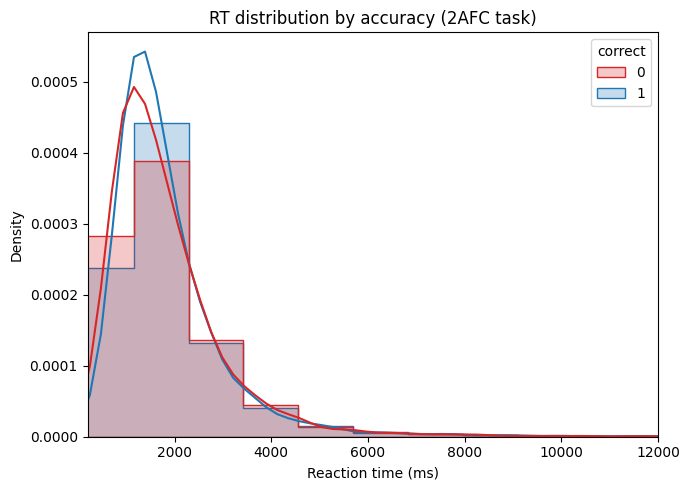

In [7]:
plt.figure(figsize=(7, 5))
sns.histplot(
    data=df, 
    x="rt", 
    kde=True,
    hue="correct",
    element="step", 
    stat="density", 
    common_norm=False,
    bins=40,
    palette={True: "tab:blue", False: "tab:red"} 
)

plt.xlabel("Reaction time (ms)")
plt.ylabel("Density")
plt.title("RT distribution by accuracy (2AFC task)")
plt.xlim(200, 12000)
plt.tight_layout()
plt.show()